# F1 Project Transfer Learning V2

1. [Libraries](#1)
2. [Data Preparation](#2)
3. [VGG16 Model](#3)
4. [Model Training](#4)
5. [Model Testing](#5)

<a id = '1'></a>
## Libraries

In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16

<a id = '2'><a>
## Data Preparation

In [2]:
#preprocessing func
preprocessInput = tf.keras.applications.vgg16.preprocess_input

#directory
base_dir = r'C:/Users/gorke/Desktop/dataf1'

#data generating
trainDatagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.1, preprocessing_function = preprocessInput)
testDatagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.1, preprocessing_function = preprocessInput)

#ffd
trainDatagen = trainDatagen.flow_from_directory(base_dir, target_size = (224, 224), subset = 'training', batch_size = 4, class_mode = 'sparse')
testDatagen = testDatagen.flow_from_directory(base_dir, target_size = (224, 224), subset = 'validation', batch_size = 4, class_mode = 'sparse')

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


<a id = '3'></a>
## VGG16 Model

In [3]:
vggModel = VGG16()
vggModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
#Creating Sequential Model
model = Sequential()

for layer in vggModel.layers[0:-1]:
    model.add(layer)
model.add(layers.Dense(4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

<a id = '4'></a>
## Model Training

In [5]:
#optimizer 
optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0001)

#loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

#compiling
model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

#fitting
result = model.fit(trainDatagen, epochs = 30, verbose = 1, validation_data = testDatagen)

Epoch 1/30
63/63 [==============================] - 11s 119ms/step - loss: 1.9836 - accuracy: 0.2460 - val_loss: 1.4341 - val_accuracy: 0.1071
Epoch 2/30
63/63 [==============================] - 9s 135ms/step - loss: 1.2728 - accuracy: 0.3889 - val_loss: 1.3824 - val_accuracy: 0.2143
Epoch 3/30
63/63 [==============================] - 9s 135ms/step - loss: 0.7688 - accuracy: 0.6627 - val_loss: 1.0569 - val_accuracy: 0.3929
Epoch 4/30
63/63 [==============================] - 9s 135ms/step - loss: 0.2484 - accuracy: 0.9167 - val_loss: 0.5389 - val_accuracy: 0.7143
Epoch 5/30
63/63 [==============================] - 9s 135ms/step - loss: 0.0998 - accuracy: 0.9563 - val_loss: 0.4965 - val_accuracy: 0.8214
Epoch 6/30
63/63 [==============================] - 9s 135ms/step - loss: 0.0839 - accuracy: 0.9762 - val_loss: 0.5078 - val_accuracy: 0.8214
Epoch 7/30
63/63 [==============================] - 9s 135ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.3566 - val_accuracy: 0.8929
Epoch

<a id = '5'></a>
## Model Testing

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mercedes


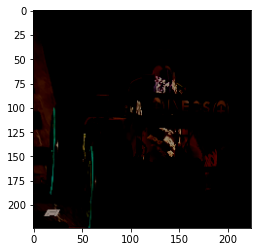

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mclaren


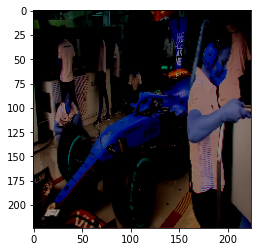

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mercedes


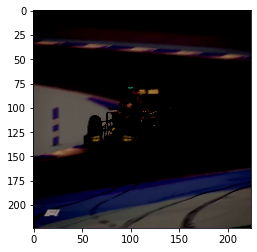

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ferrari


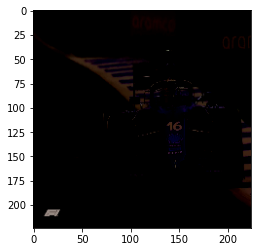

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mclaren


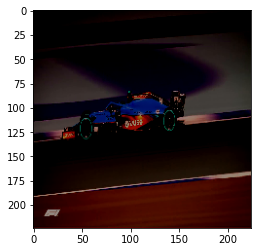

In [6]:
#Model Testing on Test Set

#printing data classes
print(testDatagen.class_indices)

#model testing
for i in range(5):
    img,label = testDatagen.next()
    a = model.predict(img)
    np.argmax(a[0])
    plt.imshow(img[0])
    if np.argmax(a[0]) == 0:
        print('ferrari')
    elif np.argmax(a[0]) == 1:
        print('mclaren')
    elif np.argmax(a[0]) == 2:
        print('mercedes')
    else:
        print('redbull')
    plt.show()  

In [7]:
#Model Testing on 1 Set

#Libraries
from PIL import Image
from skimage import transform

#testing the picture
image = Image.open('mercedes.jpg')

def testpic(path):
    img = Image.open(path)
    img = np.array(img).astype('float32')/255
    img = transform.resize(img, (224,224,3))
    img = np.expand_dims(img, axis = 0)
    print(testDatagen.class_indices)
    return img

In [8]:
img = testpic('mercedes.jpg')
pred = model.predict(img)
print(pred)
np.argmax(pred)

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
[[-6.6801453   3.284003    6.7904115  -0.59254456]]


2

## Visualization 

In [9]:
#data preparation
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
acc_loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(acc)+1)

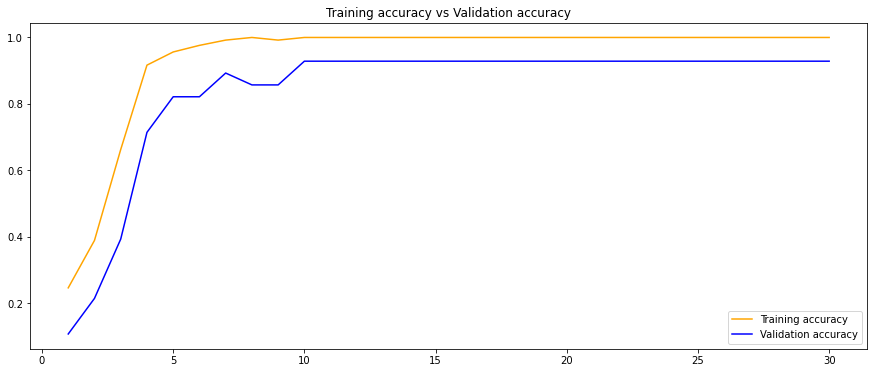

In [10]:
#plotting training accuracy and validation accuracy
plt.figure(figsize = (15,6))
plt.plot(epochs, acc, label = ('Training accuracy'), color = 'orange')
plt.plot(epochs, val_acc, label = ('Validation accuracy'), color = 'blue')
plt.title('Training accuracy vs Validation accuracy')
plt.legend()
plt.show()

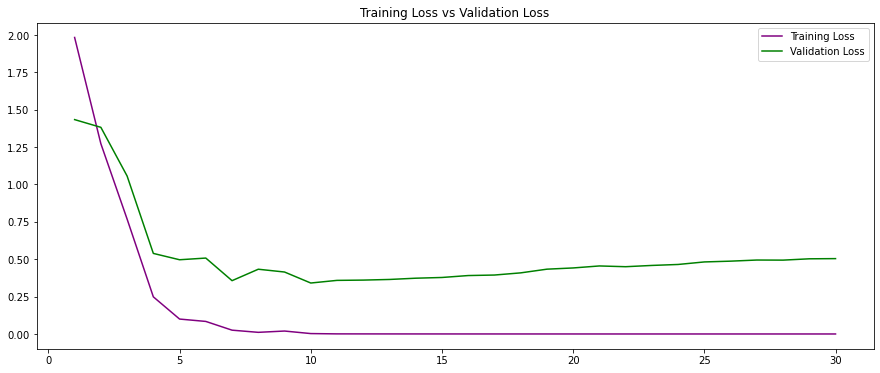

In [11]:
#plotting training loss and validation loss
plt.figure(figsize = (15,6))
plt.plot(epochs, acc_loss, label = ('Training Loss'), color = 'purple')
plt.plot(epochs, val_loss, label = ('Validation Loss'), color = 'green')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()